In [ ]:
"""
소셜네트워크 분석 - 네트워크 그래프 이론을 분석해서 사회구조를 분석하는 것
소셜네트워크는 활용분야가 넓고, 다른 머신러닝 모델과 결합하여 쓸 수 있으며, 노드와 연결선에 속성을 부여할 수 있다.
또 연결선은 방향성과 비방향성이 있고 네트워크를 설명하기 위한 여러가지 지수를 정의하여 활용할 수 있다.
방향성 그래프와 비방향성 그래프를 나눠서 그린다.

한 노드 기준에서 나가는 선(출선), 들어오는 선(입선)을 합쳐서 degree라고 한다.
이 노드 사이에 연결되는 선의 수를 행렬로 나타낼 수 있다.
밀도는 모든 노드의 입선(출선) 수의 합 / 연결 가능한 모든 출선의 경우의 수(n*(n-1))로 계산한다.
도달 가능도(Reachability)는 노드 쌍에 대하여 한 노드에서 다른 노드로 도달 가능한지의 여부를 0또는 1로 나타낸 값이다.
중심성(Centrality)은 근접, 중개, 아이겐벡터 중심성이 있다.
근접 중심성 - 해당 노드와 다른 모든 노드와의 평균 최단경로거리를 구한 다음에 역수를 취하는 방법 -> 이것이 클을 수록 네트워크의 중심에 위치하고 있다는 의미
중개 중심성 - 네트워크에서 허브역할을 얼마나 잘하는지 정보의 통로나 전달 역할을 얼마나 잘하는지에 대한 값 -> 전염병 확산의 중요한 변수를 알아볼 때 유용
아이겐벡터 중심성 - 연결된 노드에 따라 가중치를 부여하는 방법

그래프에서 노드들끼리 모두 연결된 한 집합을 컴포넌트(Component)라고 한다.
"""

In [4]:
# 사용할 패키지 다운
# pip install networkx

     ---------------------------------------- 2.0/2.0 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import networkx as nx
from operator import itemgetter

# Node와 Node 연결정보에 대한 데이터가 필요함
# 강도의 정도, 화살표 방향, 두께 등을 표시할 정보 또한 필요핟
# 그런 정보를 기록한 DataSet : quakers_nodelist.csv

In [6]:
nodes = pd.read_csv('quakers_nodelist.csv') # 노드에 관련된 데이터 읽어오기.
node_names = nodes.loc[:, "Name"]  #노드의 이름만 가져온다.
node_names = node_names.values.tolist()
nodes = nodes.values
nodes = nodes.tolist() # np.array type --> list type

edges = pd.read_csv('quakers_edgelist.csv') # 노드연결 정보 데이터 읽어오기.
edges = [tuple(i) for i in edges.values] # 튜플정보로 변형한다.

In [7]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [8]:
node_names , len(node_names) 

(['Joseph Wyeth',
  'Alexander Skene of Newtyle',
  'James Logan',
  'Dorcas Erbery',
  'Lilias Skene',
  'William Mucklow',
  'Thomas Salthouse',
  'William Dewsbury',
  'John Audland',
  'Richard Claridge',
  'William Bradford',
  'Fettiplace Bellers',
  'John Bellers',
  'Isabel Yeamans',
  'George Fox the younger',
  'George Fox',
  'John Stubbs',
  'Anne Camm',
  'John Camm',
  'Thomas Camm',
  'Katharine Evans',
  'Lydia Lancaster',
  'Samuel Clarridge',
  'Thomas Lower',
  'Gervase Benson',
  'Stephen Crisp',
  'James Claypoole',
  'Thomas Holme',
  'John Freame',
  'John Swinton',
  'William Mead',
  'Henry Pickworth',
  'John Crook',
  'Gilbert Latey',
  'Ellis Hookes',
  'Joseph Besse',
  'James Nayler',
  'Elizabeth Hooten',
  'George Whitehead',
  'John Whitehead',
  'William Crouch',
  'Benjamin Furly',
  'Silvanus Bevan',
  'Robert Rich',
  'John Whiting',
  'Christopher Taylor',
  'Thomas Lawson',
  'Richard Farnworth',
  'William Coddington',
  'Thomas Taylor',
  'Richa

In [9]:
#노드와 엣지의 총 개수
print(len(node_names))
print(len(edges))

119
174


In [54]:
G = nx.Graph() # 그래프 객체를 초기화합니다.                                                
G.add_nodes_from(node_names) # G객체에 노드를 추가합니다.                            
G.add_edges_from(edges) # G객체에 엣지를 추가합니다. = 노드끼리 연결정보
print("G 그래프의 노드 수 :", G.number_of_nodes())
print("G 그래프의 엣지 수 :", G.number_of_edges())
# nx.degree_histogram 각 차수 값의 빈도수를 리스트로 반환 = 각 degree를 가지는 노드 수를 반환
# 모든 degree 수는 각각의 노드의 degree를 더한 값이기 때문에, G그래프의 엣지 수를 중복해서 더한 값과 같다. 
# 즉 all_degree = G_graph_degree * 2
all_degree = [v*i for v, i in zip(nx.degree_histogram(G), range(len(nx.degree_histogram(G))))]
all_degree = sum(all_degree)
print("G 그래프의 평균 디그리 :", all_degree/G.number_of_nodes())
all_degree

G 그래프의 노드 수 : 119
G 그래프의 엣지 수 : 174
G 그래프의 평균 디그리 : 2.9243697478991595


348

In [55]:
#노드의 속성정보를 사전형태의 타입으로 만든다. 
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

In [56]:
for node in nodes: # 노드의 속성정보를 세팅한다. node[0]은 노드의 이름이다. 
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

In [57]:
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [63]:
for n in G.nodes():  #세팅한 노드의 정보중 생년을 가져와서 출력한다. 
    print(n, G.nodes[n]['birth_year'])  

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

In [64]:
#네트워크의 밀도 
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [65]:
#from --> to 의 최단거리

fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [66]:
#위에서 구한 최단거리의 길이 
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


In [67]:
# 네트워크의 컴포넌트는 1개인가? 즉 모두 연결이 되어 있는가? 
print(nx.is_connected(G))

# 컴포넌트의 리스트 
# 가장 큰 컴포넌트
components = nx.connected_components(G)
largest_component = max(components, key=len)

# 가장 큰 컴포넌트로 서브그래프를 만든다. 
# 서브그래프의 반경(크기)을 출력한다. 

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


In [68]:
#이행성의 비율
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


In [69]:
#각각의 노드의 degree를 계산하여 도의 속성정보로 세팅한다. 
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
degree_dict

{'Joseph Wyeth': 1,
 'Alexander Skene of Newtyle': 1,
 'James Logan': 4,
 'Dorcas Erbery': 1,
 'Lilias Skene': 1,
 'William Mucklow': 1,
 'Thomas Salthouse': 2,
 'William Dewsbury': 3,
 'John Audland': 6,
 'Richard Claridge': 2,
 'William Bradford': 3,
 'Fettiplace Bellers': 1,
 'John Bellers': 1,
 'Isabel Yeamans': 1,
 'George Fox the younger': 1,
 'George Fox': 22,
 'John Stubbs': 5,
 'Anne Camm': 2,
 'John Camm': 4,
 'Thomas Camm': 3,
 'Katharine Evans': 1,
 'Lydia Lancaster': 1,
 'Samuel Clarridge': 2,
 'Thomas Lower': 1,
 'Gervase Benson': 2,
 'Stephen Crisp': 3,
 'James Claypoole': 2,
 'Thomas Holme': 2,
 'John Freame': 1,
 'John Swinton': 1,
 'William Mead': 2,
 'Henry Pickworth': 1,
 'John Crook': 4,
 'Gilbert Latey': 2,
 'Ellis Hookes': 1,
 'Joseph Besse': 2,
 'James Nayler': 16,
 'Elizabeth Hooten': 1,
 'George Whitehead': 13,
 'John Whitehead': 1,
 'William Crouch': 2,
 'Benjamin Furly': 10,
 'Silvanus Bevan': 1,
 'Robert Rich': 2,
 'John Whiting': 1,
 'Christopher Taylor': 

In [71]:
# William Penn의 노드정보 
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': 1644, 'death_year': 1718, 'sdfb_id': 10009531, 'degree': 18}


In [72]:
# 모든 노드의 degree를 내림차순으로 나타낸다. 
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree

[('George Fox', 22),
 ('William Penn', 18),
 ('James Nayler', 16),
 ('George Whitehead', 13),
 ('Margaret Fell', 13),
 ('Benjamin Furly', 10),
 ('Edward Burrough', 9),
 ('George Keith', 8),
 ('Thomas Ellwood', 8),
 ('Francis Howgill', 7),
 ('John Perrot', 7),
 ('John Audland', 6),
 ('Richard Farnworth', 6),
 ('Alexander Parker', 6),
 ('John Story', 6),
 ('John Stubbs', 5),
 ('Thomas Curtis', 5),
 ('John Wilkinson', 5),
 ('William Caton', 5),
 ('Anthony Pearson', 5),
 ('James Logan', 4),
 ('John Camm', 4),
 ('John Crook', 4),
 ('John Burnyeat', 4),
 ('Rebecca Travers', 4),
 ('Mary Penington', 4),
 ('William Dewsbury', 3),
 ('William Bradford', 3),
 ('Thomas Camm', 3),
 ('Stephen Crisp', 3),
 ('Robert Barclay', 3),
 ('Tace Sowle', 3),
 ('Anthony Sharp', 3),
 ('Charles Marshall', 3),
 ('Martha Simmonds', 3),
 ('Thomas Salthouse', 2),
 ('Richard Claridge', 2),
 ('Anne Camm', 2),
 ('Samuel Clarridge', 2),
 ('Gervase Benson', 2),
 ('James Claypoole', 2),
 ('Thomas Holme', 2),
 ('William Mead

In [75]:
# 상위20순위의 degree를 나타낸다. 
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


In [76]:
betweenness_dict = nx.betweenness_centrality(G) # betweenness centrality(중개 중심성)
eigenvector_dict = nx.eigenvector_centrality(G) # eigenvector centrality(아이겐벡터 중심성) 

# 각각의 노드의 속성에 위에서 계산한 중심성을 세팅한다. 
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [77]:
#모든 노드의 중개중심성(betweenness centrality)을 출력한다. 
betweenness_dict

{'Joseph Wyeth': 0.0,
 'Alexander Skene of Newtyle': 0.0,
 'James Logan': 0.026944806605823553,
 'Dorcas Erbery': 0.0,
 'Lilias Skene': 0.0,
 'William Mucklow': 0.0,
 'Thomas Salthouse': 0.0,
 'William Dewsbury': 0.0,
 'John Audland': 0.04164936340077581,
 'Richard Claridge': 0.026944806605823553,
 'William Bradford': 0.000676034574339659,
 'Fettiplace Bellers': 0.0,
 'John Bellers': 0.0,
 'Isabel Yeamans': 0.0,
 'George Fox the younger': 0.0,
 'George Fox': 0.23683257726065216,
 'John Stubbs': 0.024316593960227152,
 'Anne Camm': 0.0008462504225216084,
 'John Camm': 0.0017637259162682885,
 'Thomas Camm': 0.004187620289315204,
 'Katharine Evans': 0.0,
 'Lydia Lancaster': 0.0,
 'Samuel Clarridge': 0.00159488973048295,
 'Thomas Lower': 0.0,
 'Gervase Benson': 0.0,
 'Stephen Crisp': 0.00038509826645419866,
 'James Claypoole': 0.012532163379621009,
 'Thomas Holme': 0.013617267854555989,
 'John Freame': 0.0,
 'John Swinton': 0.0,
 'William Mead': 0.0,
 'Henry Pickworth': 0.0,
 'John Crook': 

In [78]:
#모든 노드의 아이겐벡터 중심성(eigenvector centrality)을 출력한다. 
eigenvector_dict

{'Joseph Wyeth': 0.02393856925288573,
 'Alexander Skene of Newtyle': 8.138875606113614e-16,
 'James Logan': 0.04447446026748655,
 'Dorcas Erbery': 0.04558398623515939,
 'Lilias Skene': 8.138875606113614e-16,
 'William Mucklow': 0.06106681323567699,
 'Thomas Salthouse': 0.09548628544138768,
 'William Dewsbury': 0.11057869321157117,
 'John Audland': 0.09830889719333748,
 'Richard Claridge': 0.03745784226737175,
 'William Bradford': 0.06812170326615952,
 'Fettiplace Bellers': 8.138875606113614e-16,
 'John Bellers': 8.138875606113614e-16,
 'Isabel Yeamans': 0.036752364236589646,
 'George Fox the younger': 0.034419472205710684,
 'George Fox': 0.44917507108599225,
 'John Stubbs': 0.10693500692141822,
 'Anne Camm': 0.01558409271306099,
 'John Camm': 0.021785514186690304,
 'Thomas Camm': 0.0163207219782383,
 'Katharine Evans': 8.138875606113614e-16,
 'Lydia Lancaster': 8.138875606113614e-16,
 'Samuel Clarridge': 0.006241256686351222,
 'Thomas Lower': 0.034419472205710684,
 'Gervase Benson': 0.

In [79]:
#상위20순위의 중개중심성을 출력한다. 
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [80]:
#상위 20순위의 중개 중심성을 추출한다. 
top_betweenness = sorted_betweenness[:20]

#상위 20순위의 중개 중심성을 가져와서 노드의 이름,degree와 함께 출력한다. 
for tb in top_betweenness: 
    degree = degree_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

(-1.1405205320602214,
 1.2033978786120572,
 -1.061309930492632,
 0.9761500888529262)

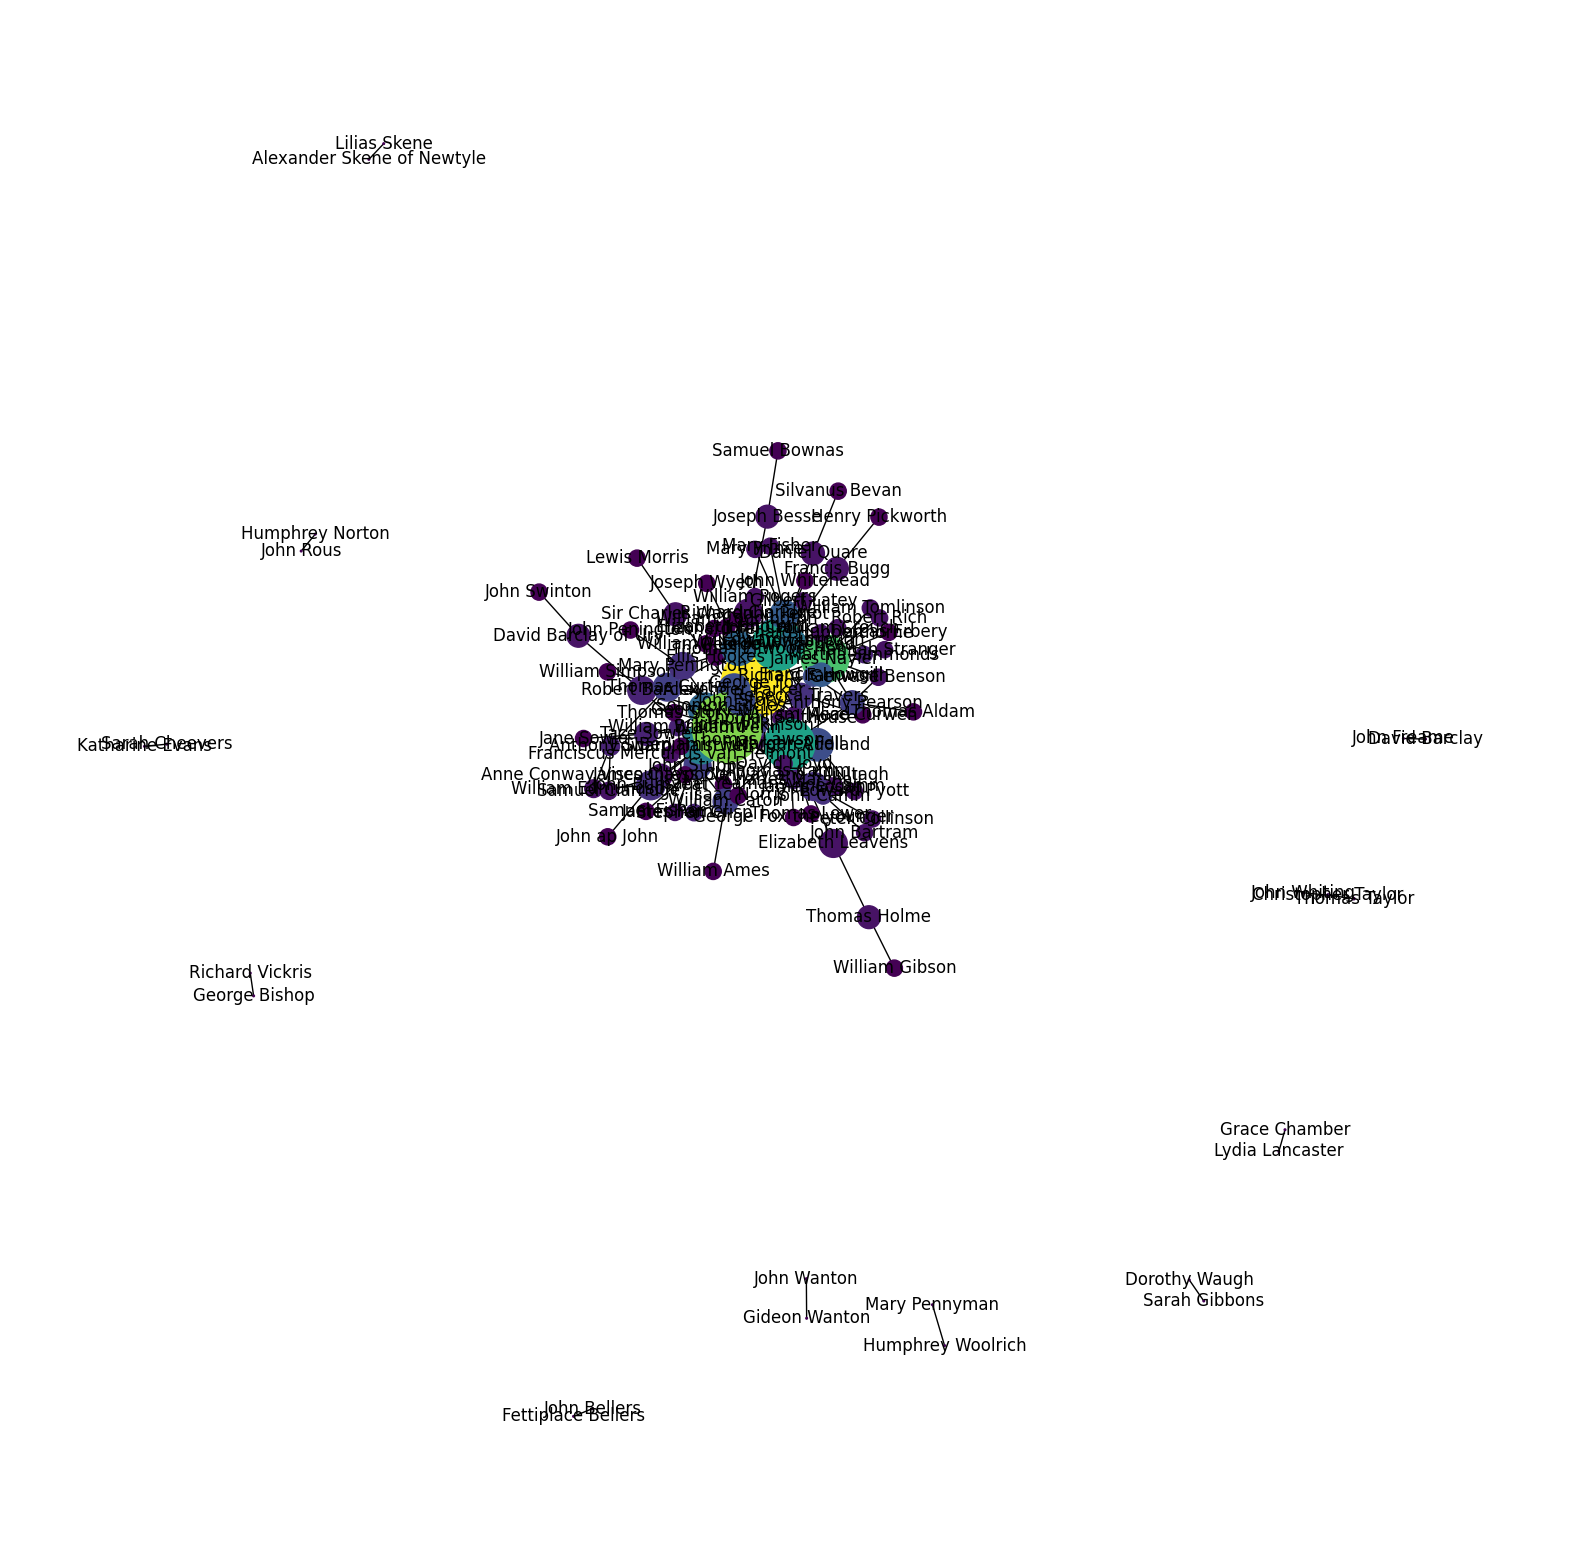

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

#노드의 색깔은 degree의 정도이고 노드의 반지름은 중개 중심성 지수이다. 
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.0684901951440475,
 0.8688455656047707,
 -1.16896809002424,
 1.2061010402285477)

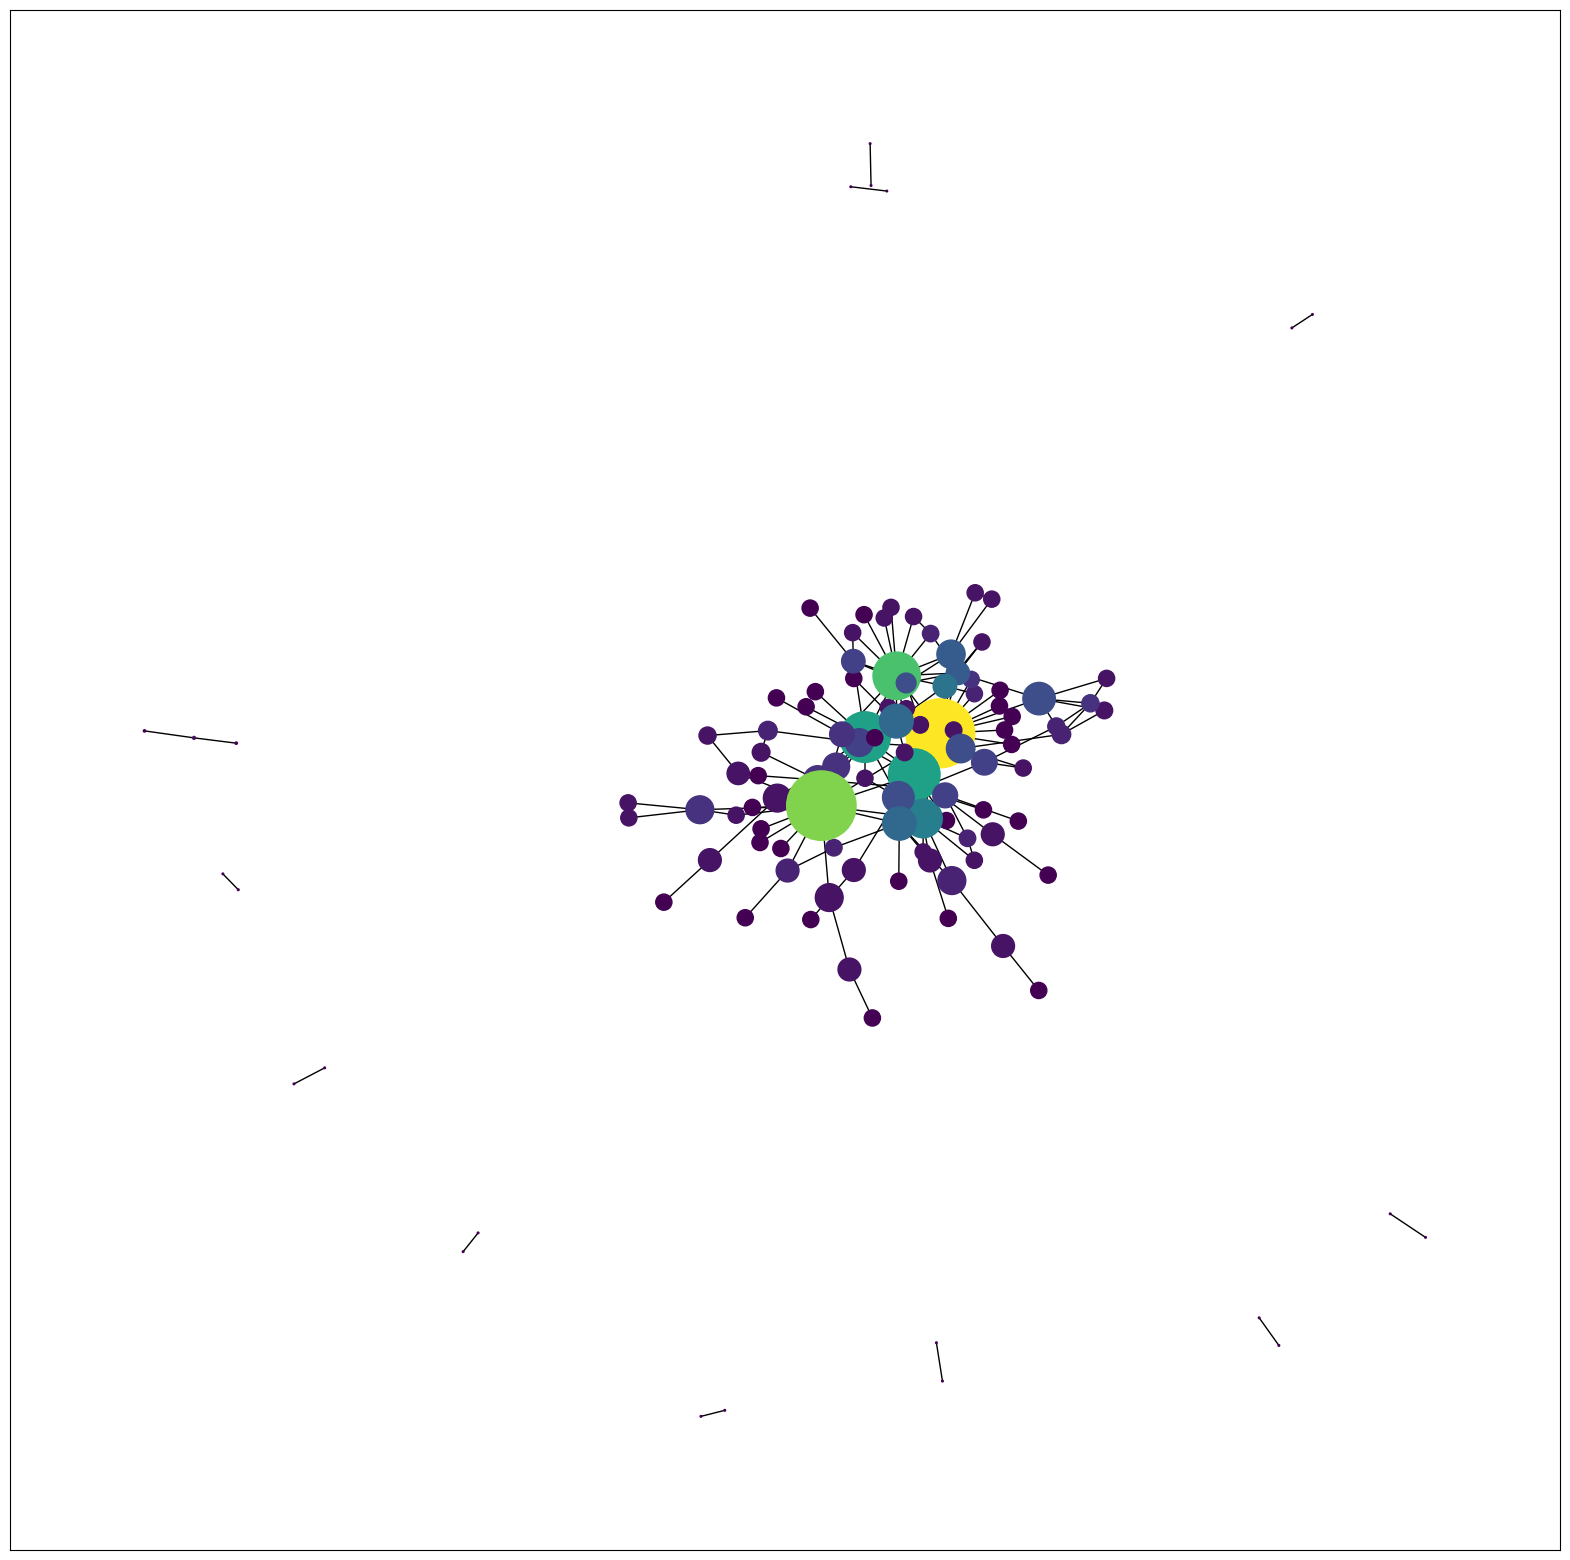

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('on')

(-0.9206665798759692,
 1.1123137819056164,
 -1.024216908978302,
 1.1923464031155853)

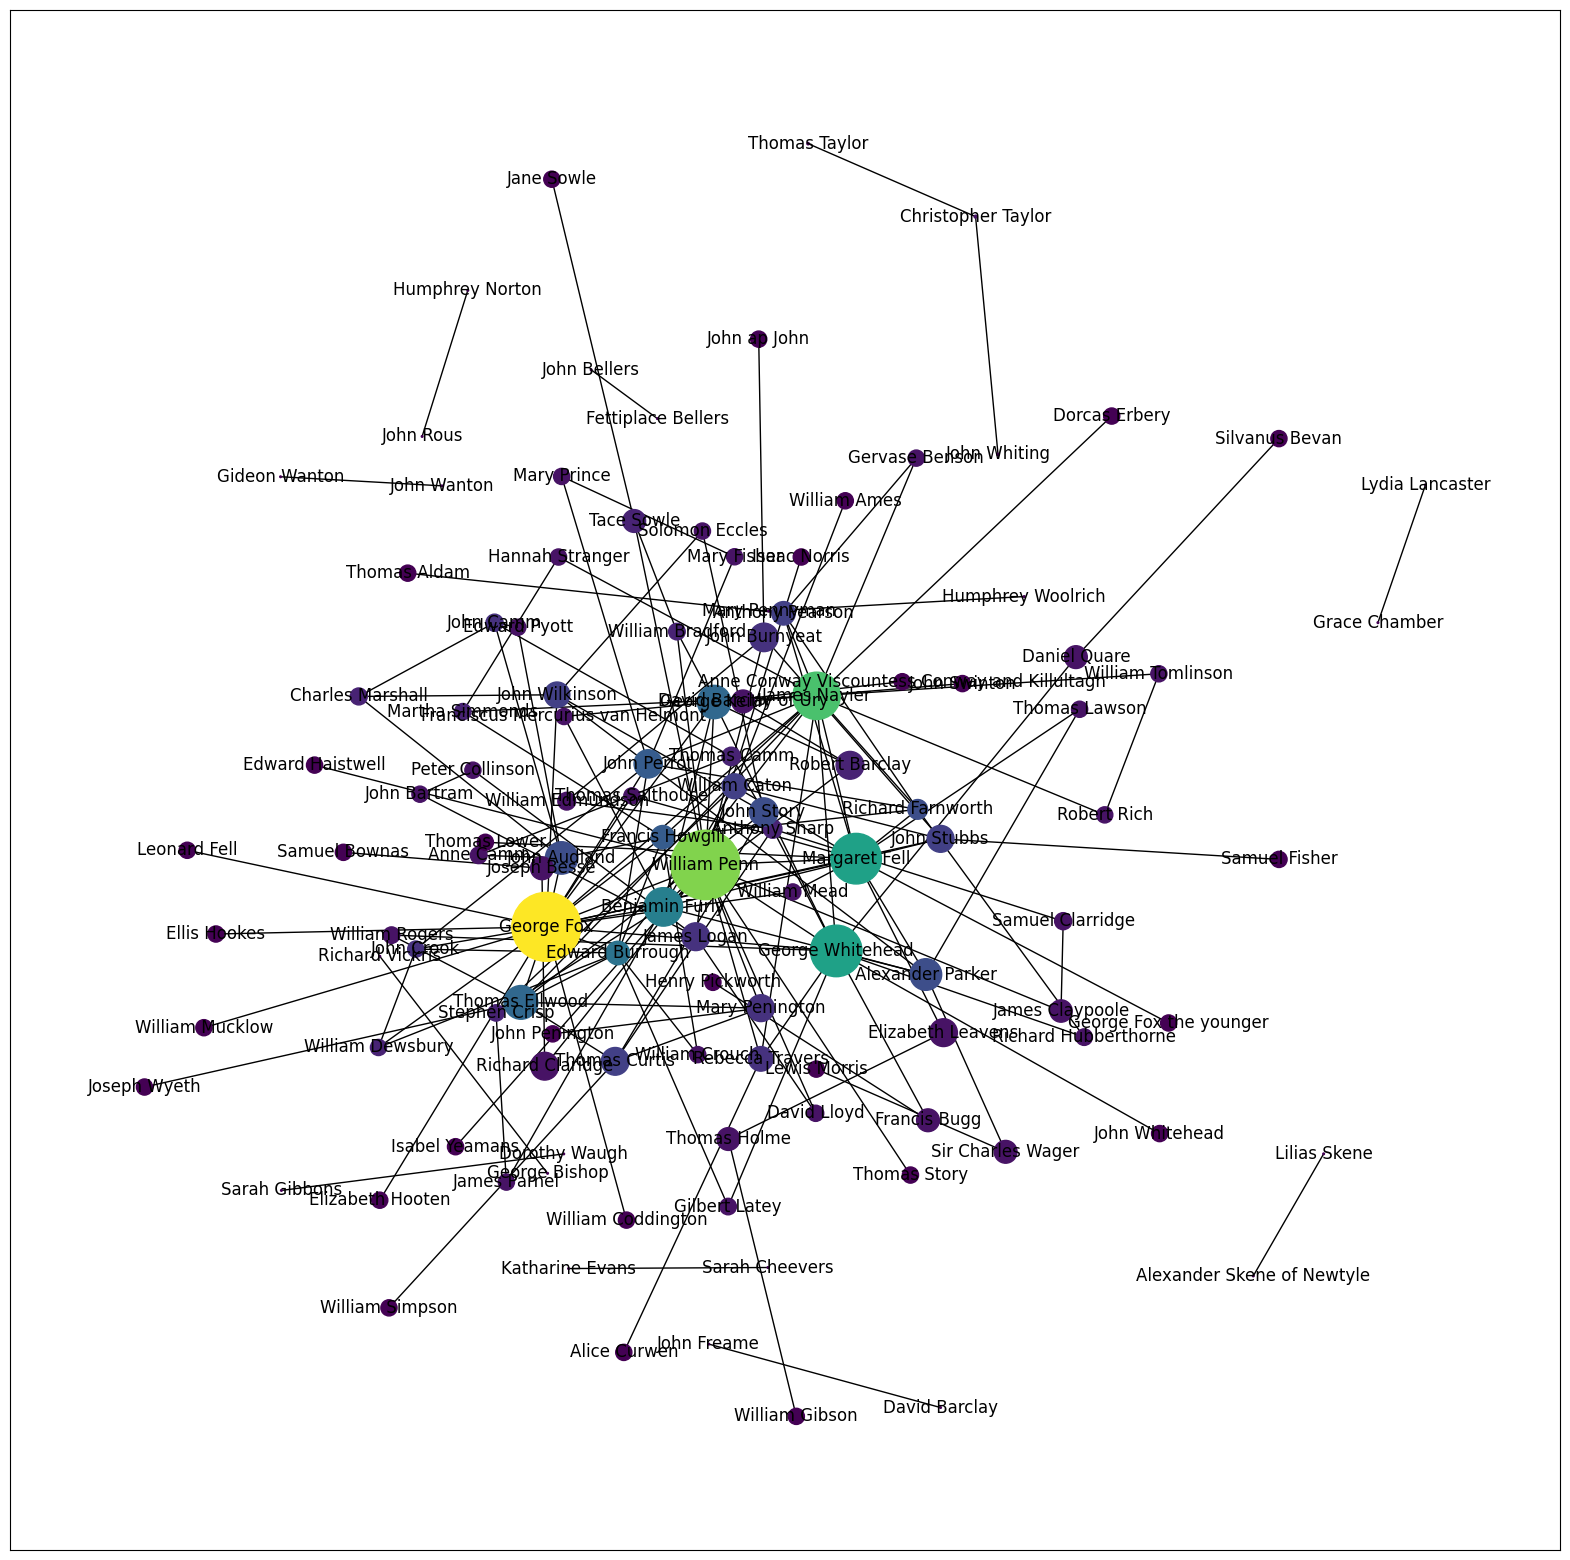

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline  

G_fb = G

pos = nx.spring_layout(G_fb , iterations = 5)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size)
plt.axis('on')